## Geographic Impacts

The geographic distribution of sales across the US was examined. The results were very surprising and could either be due to very poor quality data and data collection or very unusual sales patterns.

***Customer Distribution***

The number of customers across states is very evenly spread, the interquartile range is approximately 80 to 95; this is surprising given the population range across all states is 300 to nearly 39 million.

***Sales Distribution***

The sales data was analysed in a variety of ways (box plot, scatter plot with regression line, top and bottom 5, a choropleth map) but all supported the following conclusions:

- The spread of thee total sales count and the sales $ value is very small (when the population distribution is considered)
- For example the 4th highest sales are in the US Minor Outlying Islands which has a population of 300 but spending as much as Alabama which has a population of over 5 million
- And, the largest state, California, with a population of nearly 39 million has the lowest sales total

This is in contrast to the number of physical store per state which do correlate well with population size. So it does seem likely that there is a problem with the quality of the sales data collected. Before making any business recommendations, the data collection pipeline and sources should be investigated; or worst case the operational information systems that provided the source data.
 

In [1]:
# Retrieve the completed working dataframes for analysis
%store -r sales_df stock_df customer_reviews_df customers_df states_df

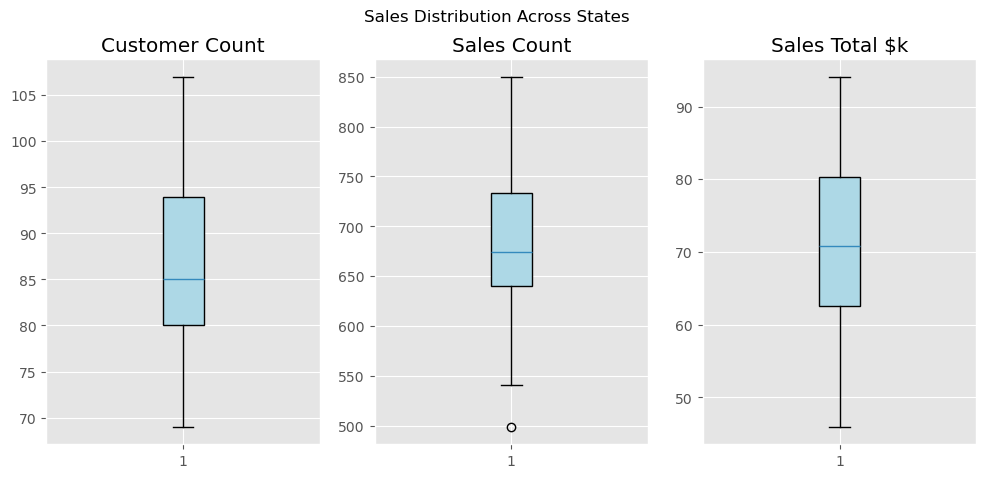

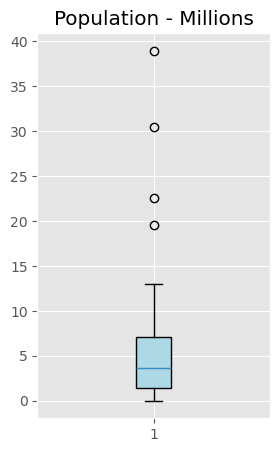

Top Five States by Sales Value


,state_name,population,customer_count,sales_count,sales_total$k
9,Florida,22610726,90,838,94.10
14,Indiana,6862199,83,715,93.25
34,North Dakota,783926,79,802,89.19
53,US Minor Outlying Islands,300,79,716,86.74
0,Alabama,5108468,96,774,86.14


Bottom Five States by Sales Value


,state_name,population,customer_count,sales_count,sales_total$k
4,California,38965193,79,546,45.95
16,Kansas,2940546,79,541,49.78
43,Texas,30503301,76,705,54.34
30,New Jersey,9290841,102,499,55.79
22,Michigan,10037261,69,630,55.90


In [ ]:
# Examine key customer and sales data by state

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create customer sales 
cust_sales = pd.merge(customer_reviews_df, customers_df, on='customer_id')
cust_sales = pd.merge(cust_sales, sales_df, on='uniq_id')

# Aggregate customer sales counts and total value
cust_summary = cust_sales[['customer_id', 'state_ISO']].drop_duplicates()
groups = cust_sales.groupby('customer_id')
cust_summary['sales_count'] = groups['uniq_id'].transform('count')
cust_summary['sales_total$k'] = groups['sale_price'].transform('sum')
cust_summary['sales_total$k'] = (cust_summary['sales_total$k'] / 1000).round(2)

# Aggregate the customer counts and sales totals by state
states_working = states_df.copy()
states_working['customer_count'] = customers_df.groupby('state_ISO')['state_ISO'].transform('count')
states_working.reset_index()
states_working['sales_count'] = cust_summary.groupby('state_ISO')['sales_count'].sum().reset_index()['sales_count']
states_working['sales_total$k'] = cust_summary.groupby('state_ISO')['sales_total$k'].sum().reset_index()['sales_total$k']

# Some analysis of these figures geographical
# Too many states for a meaningful bar plot for each states ...

# Distribution of sales across states, using box plots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize =(12, 5))
fig.suptitle('Sales Distribution Across States')

ax0.set_title('Customer Count')
ax1.set_title('Sales Count')
ax2.set_title('Sales Total $k')

box0 = ax0.boxplot(states_working['customer_count'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
box1 = ax1.boxplot(states_working['sales_count'], patch_artist=True)
for patch in box1['boxes']:
    patch.set(facecolor='lightblue')
box2 = ax2.boxplot(states_working['sales_total$k'], patch_artist=True)
for patch in box2['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# As comparison, the population distribution
fig,ax0 = plt.subplots(figsize =(3, 5))
ax0.set_title('Population - Millions')
box0 = ax0.boxplot(states_working['population']/1000000, patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Examine top and bottom 5 states by sales value
top5 = states_working.nlargest(5, 'sales_total$k')
bottom5 = states_working.nsmallest(5, 'sales_total$k')

print('Top Five States by Sales Value')
display(top5[['state_name', 'population', 'customer_count', 'sales_count', 'sales_total$k']])
print('Bottom Five States by Sales Value')
display(bottom5[['state_name', 'population', 'customer_count', 'sales_count', 'sales_total$k']])



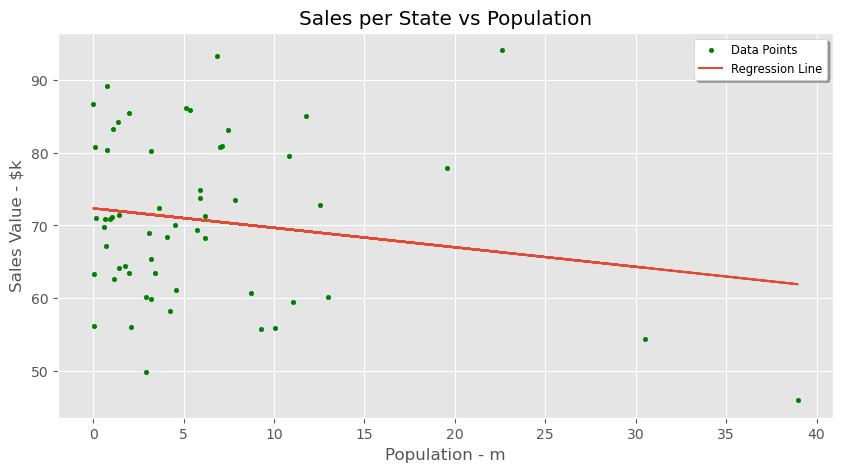

In [3]:
# Compare the sales value per state against the population
# Scatter plot and regression line

import scipy.stats

x = states_working['population'] / 1000000
y = states_working['sales_total$k']

# Calculate the regression line
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Scatter plot with fir line
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title('Sales per State vs Population')
ax.set_xlabel('Population - m')
ax.set_ylabel('Sales Value - $k')

ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')

plt.show()


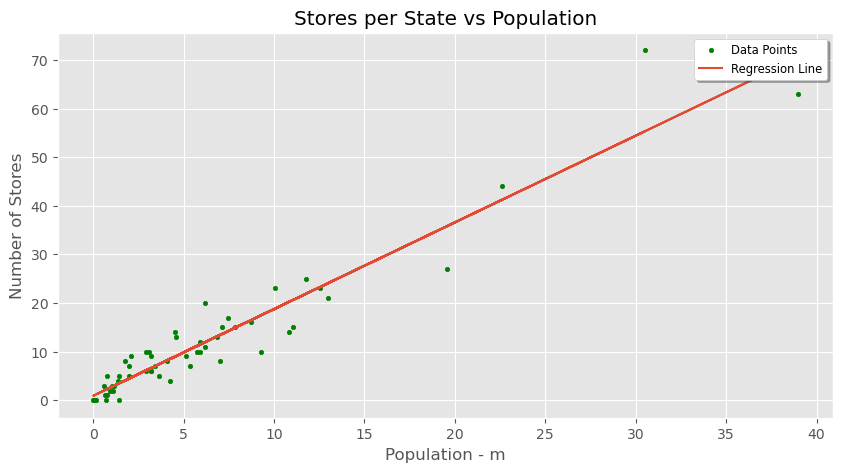

In [4]:
# Sanity check of physical stores per state against the population
# Scatter plot and regression line

import scipy.stats

x = states_working['population'] / 1000000
y = states_working['stores_total']

# Calculate the regression line
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

# Scatter plot with fir line
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title('Stores per State vs Population')
ax.set_xlabel('Population - m')
ax.set_ylabel('Number of Stores')

ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')

plt.show()

In [5]:
# Map plot of sales totals per state
import plotly.express as px

fig = px.choropleth(states_working, locations='state_ISO', locationmode='USA-states', color='sales_total$k',          # Column to color by
        color_continuous_scale='Blues', scope='usa', title='Sales Value $k by State')

fig.show()
